# Keras Activation Functions

Activation functions are used to modify the output response of the standard
`dot(input, weights)`
operation performed by each node of a neural network layer. 

The output of a node is the result of the following operation:  
```output = activation( dot(input, weight) + bias )```

Keras provide several predefined activation functions which can be used to enhance, dump, model the intensity of the basic response of the layer.

In [ ]:
from tensorflow.keras import activations
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-3, 3, 0.1)

# Activation functions with open bounds

These activation functions share the property of having no bounds over the range values of output.  
These functions are very versatile (most used activation is relu), yet a different response is provided on positive and negative input values.

The simplest activation function is the linear response $f(x) = x$, which in practice does not alter the response of the default <code>dot(input, weight)</code> kernel operation of a single node of a layer.

Another simple open bounds activation functions is the exponential function, which enhances response of high input values over lower ones.

Other open bounds activation functions are <b>elu, selu, relu, softplus</b> which are later described.

## softplus

`SOFTPLUS` implements the following activation function:

$$f(x) = log( 1 + e^x )$$

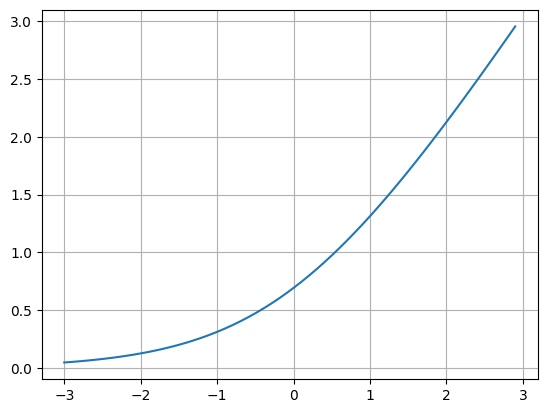

In [2]:
softplus = activations.softplus(x)

plt.plot(x, softplus)
plt.grid()

## elu

`ELU` stands for exponential linear unit. The exponential linear activation:

$$
\begin{equation}
  ELU(x, \alpha) = \left\{
  \begin{array}{@{}ll@{}}
    x, & \text{if}\ x > 0 \\
    \alpha \; ( e^x - 1 ), & \text{otherwise}
  \end{array}\right.
\end{equation} 
$$

default $\alpha = 1.0$


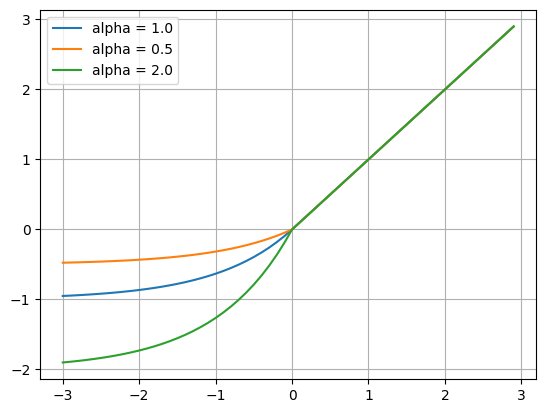

In [3]:
elu1 = activations.elu(x, alpha=1.0) # default
elu2 = activations.elu(x, alpha=0.5)
elu3 = activations.elu(x, alpha=2.0)

plt.plot(x, elu1, label="alpha = 1.0")
plt.plot(x, elu2, label="alpha = 0.5")
plt.plot(x, elu3, label="alpha = 2.0")

plt.legend()
plt.grid()

## selu

`SELU` stands for scaled `ELU`:

$$\mathrm{scale} * ELU(x, \alpha)$$

where $\alpha$ and $\mathrm{scale}$ are chosen so that the mean and variance of the inputs are preserved between two consecutive layers (as long as the weights are initialized correctly).

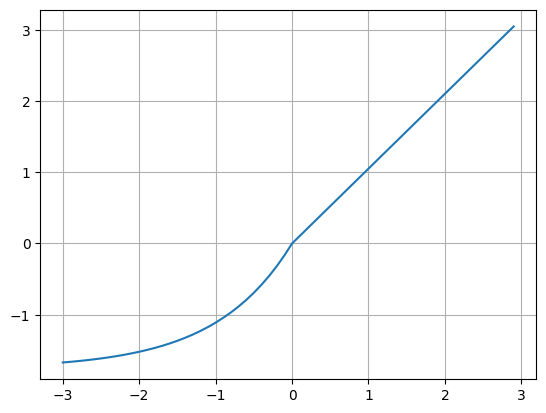

In [4]:
selu = activations.selu(x)

plt.plot(x, selu)
plt.grid()

## ReLU

`ReLU` stands for rectified `ELU`.
In its default form it is very similar to a linear responce function
$f(x) = max(0,x)$, which cutoff negative values and enhance stong input over lighter ones.

`ReLU` is probably one of the most used activation function in input or hidden layers of a neural network.

`ReLU` can be also customized with some parameters:
* $\mathrm{max\_value}$  which sets a plateau over output maximum responce value
* $\alpha$     which model responce over negative input values

<code>ReLU</code> functional form:

$$
\begin{equation}
  ReLU(x, \alpha) = \left\{
  \begin{array}{@{}ll@{}}
    \mathrm{max\_value}, & x \geqslant \mathrm{max\_value} \\
    x, & \mathrm{threshold} \leqslant x < \mathrm{max\_value} \\
    \alpha \; (x - \mathrm{threshold}), & \text{otherwise}
  \end{array}\right.
\end{equation} 
$$

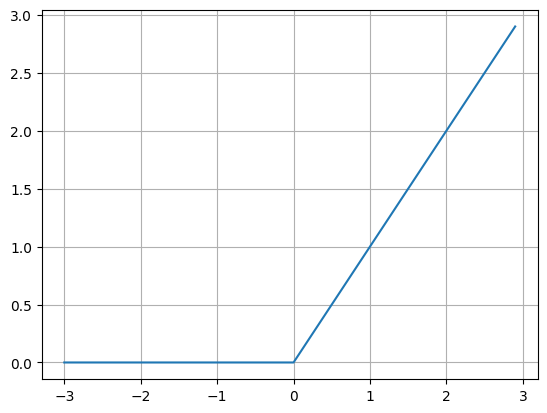

In [5]:
relu1 = activations.relu(x, alpha=0.0, max_value=None) # default

plt.plot(x, relu1)
plt.grid()

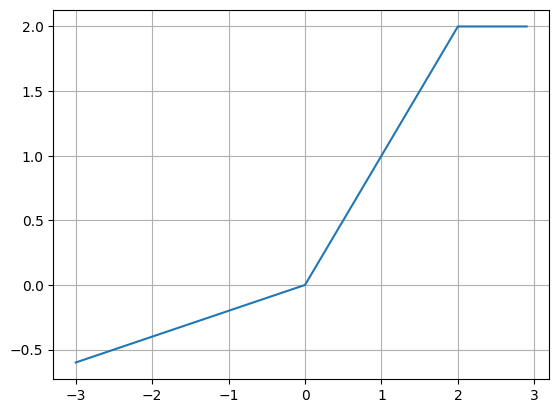

In [6]:
relu2 = activations.relu(x, alpha=0.2, max_value=2.0) # custom relu with plateau and tail

plt.plot(x, relu2)
plt.grid()

* is the most used activation function
* cheap to compute
* range is [0, $\infty$)
* $ReLU(x)$ is zero when $x$ is less than zero and $ReLU(x)$ is equal to $x$ when $x$ is above or equal to zero
* function and derivative are both monotonic
* any negative input turns to zero immediately
* sparse activation
* not have vanishing gradient problem
* it is able to reproduce a true zero, but it represents as zero all negative values (dying ReLu problem)
* not used in RNN because it can b very large outputs

# Activation functions with plateau

The following activation functions share the property of having a max plateu value for positive/negative values. 
These plateau functions are best used for "normalized" input and/or to put some "normalization" over output values. These functions have a sigmoidal “s” shape that saturates for inputs of large magnitude. This behavior makes them useful for categorization.

## sigmoid of logistic function

The `SIGMOID` function has the following functional form:

$$f(x) = \frac{1}{1 + e^{-x}}$$

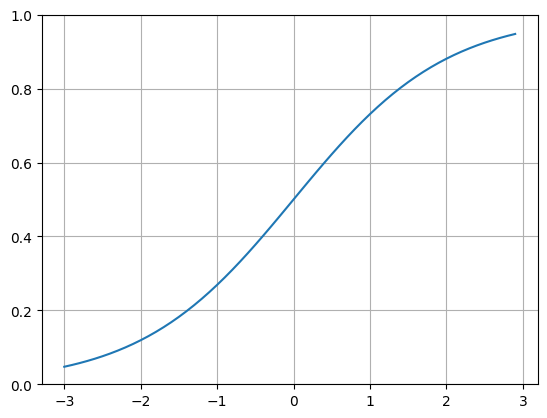

In [7]:
sigmoid = activations.sigmoid(x)

plt.plot(x, sigmoid)
plt.ylim(0, 1)
plt.grid()

* exists between [0, 1]
* is used for models where we have to predict the probability
* differentiable at any point
* function is monotonic but derivative not
* $exp$ function is computationally expensive
* It may responsible of vanishing gradient problem

## softsign

The `SOFTSIGN` activation is:
$$f(x) = \frac{x}{abs(x) + 1}$$

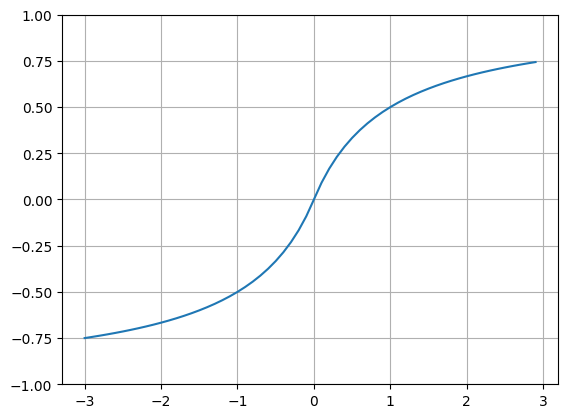

In [8]:
softsign = activations.softsign(x)

plt.plot(x, softsign)

plt.ylim(-1, 1)
plt.grid()

## tanh

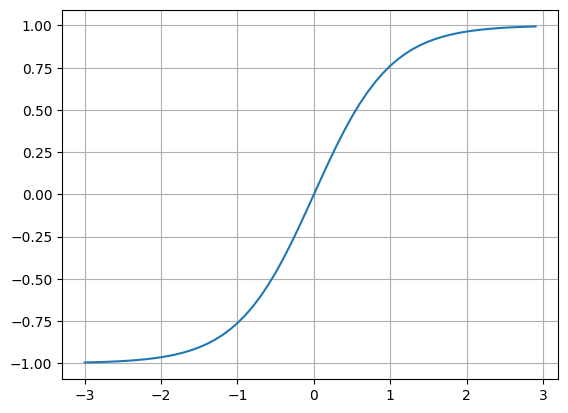

In [9]:
tanh = activations.tanh(x)

plt.plot(x, tanh)
plt.grid()

* range is [-1, +1]
* is sigmoidal (s-shaped)
* negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero
* is used for classification between two classes
* function is monotonic but derivative not
* The gradient is stronger respect to sigmoid but tanh also has a vanishing gradient problem

# Activation functions derivatives

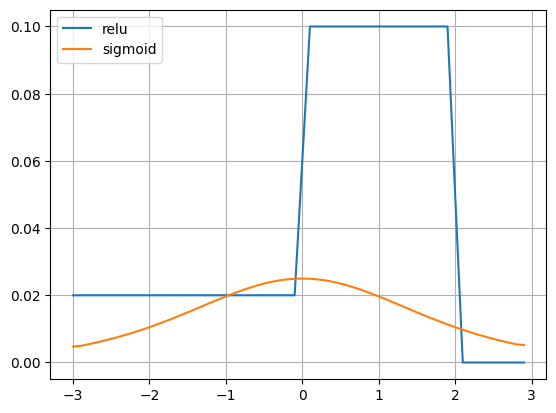

In [10]:
#plt.plot(x, np.gradient(softplus), label="softplus")
#plt.plot(x, np.gradient(elu1), label="elu")
#plt.plot(x, np.gradient(selu), label="selu")
plt.plot(x, np.gradient(relu2), label="relu")
plt.plot(x, np.gradient(sigmoid), label="sigmoid")
#plt.plot(x, np.gradient(softsign), label="softsign")
#plt.plot(x, np.gradient(tanh), label="tanh")

plt.legend()
plt.grid()

# Best practices
* Use $ReLU$ in hidden layers as first choice. $ReLu$ works as a general approximator
* Pay attention to domain and codomain values
* Normalize the data in order to achieve higher validation accuracy
* Do not use sigmoid and tanh function in networks with many layers due to vanishing gradient problem
* Pay attention to use $ReLU$ in RNN
* Use sigmoid or tanh for classification problem